<a href="https://colab.research.google.com/github/nadj4/masinsko-ucenje-radovi/blob/main/GradijentniSpust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

np.random.seed(42) #random vrednosti za parametre, seed znaci da ce za svakoga ko re-runuje da bude isti output

#parametri
theta= np.random.randn(2) # randn- random normalna raspodela

#hiperparametri
epohe= 100
eta= 0.1

print(f"Inicijalne vrednosti parametra su {theta}")

Inicijalne vrednosti parametra su [ 0.49671415 -0.1382643 ]


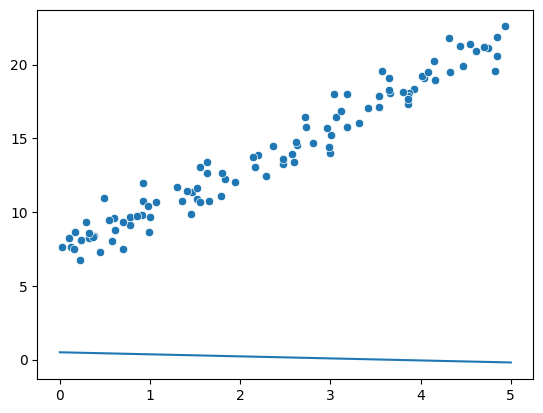

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Generisanje skupa podataka
n_slucajeva= 100
X = 5 * np.random.rand(n_slucajeva) #rand je uniformna raspodela, koju prati x, da bi domen bio od 0 do 5 mnozi se sa 5
y = 7 + 3* X + np.random.randn(n_slucajeva) # 7 i 3 su random parametri, moze bilo sta, + E koje prati normalnu raspodelu da bi bila linearna regresija

space= np.linspace(0,5,)
y_line= theta[0] + (theta[1] * space)
sns.scatterplot(x=X, y=y)
sns.lineplot(x= space, y=y_line)
plt.show()

<ipython-input-3-6cc404f9ea2e>:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, _ = plt.subplots()


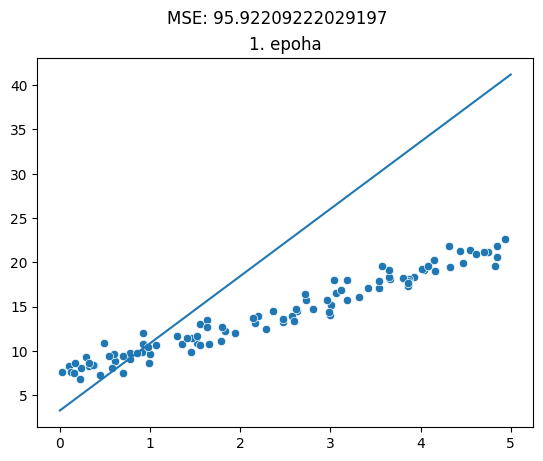

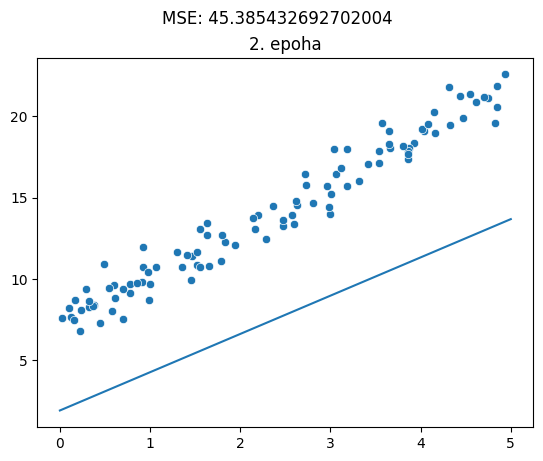

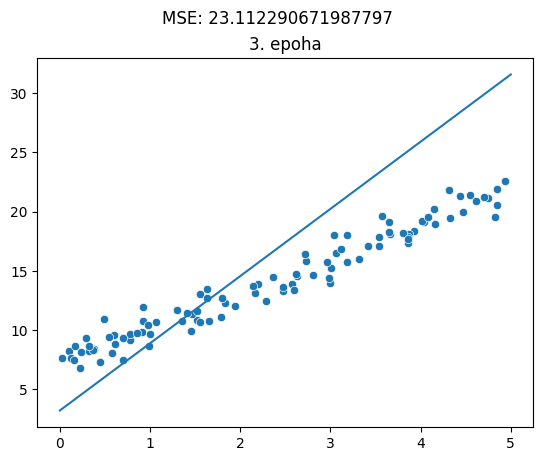

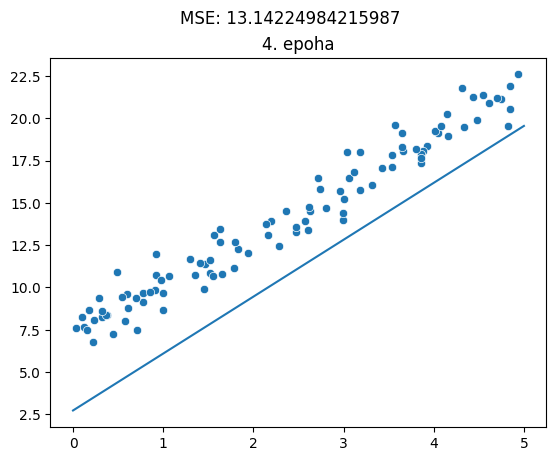

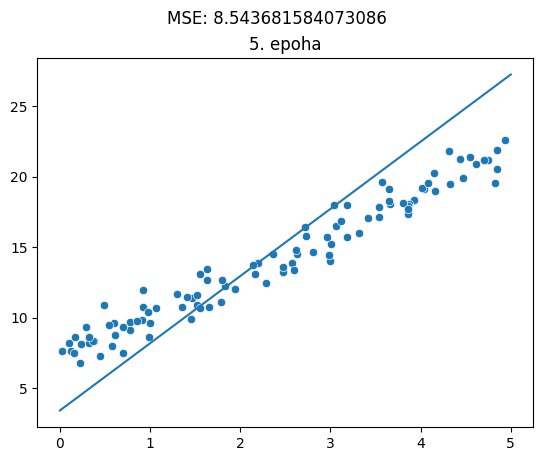

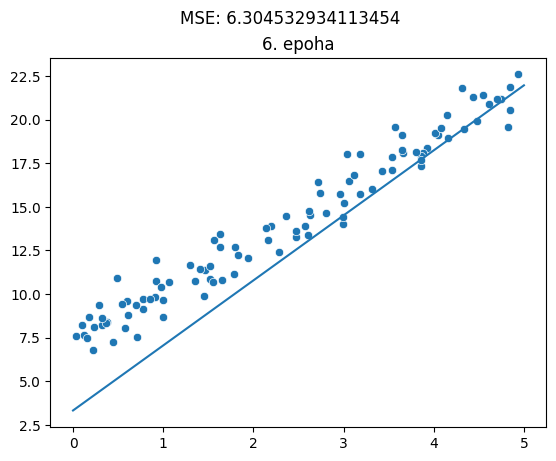

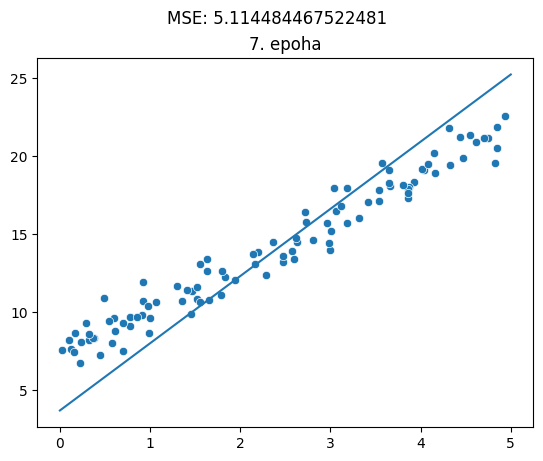

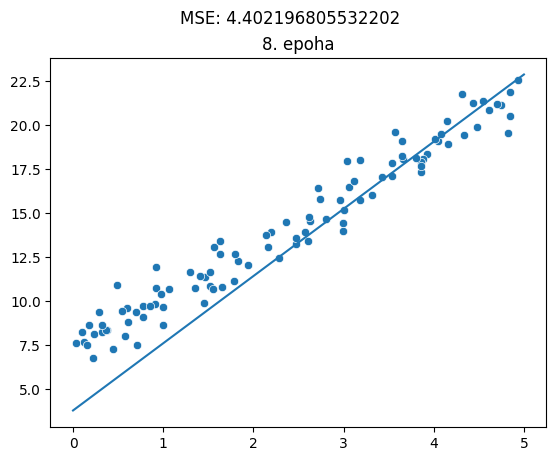

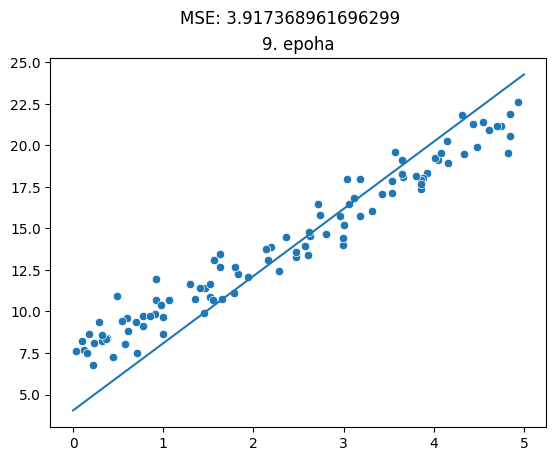

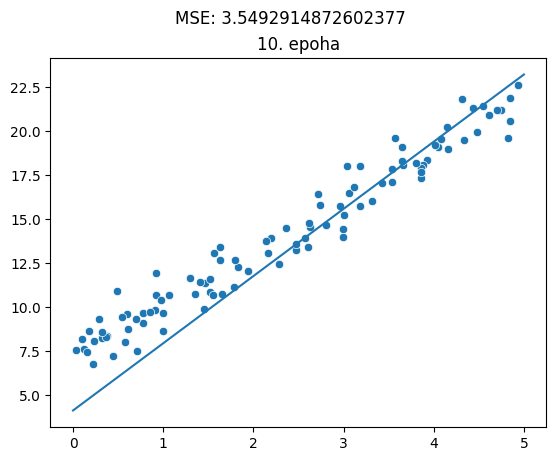

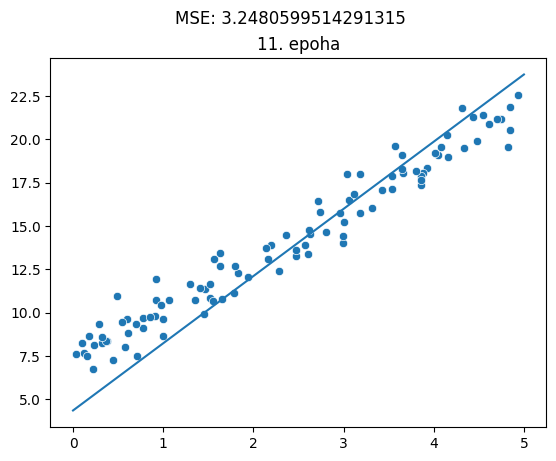

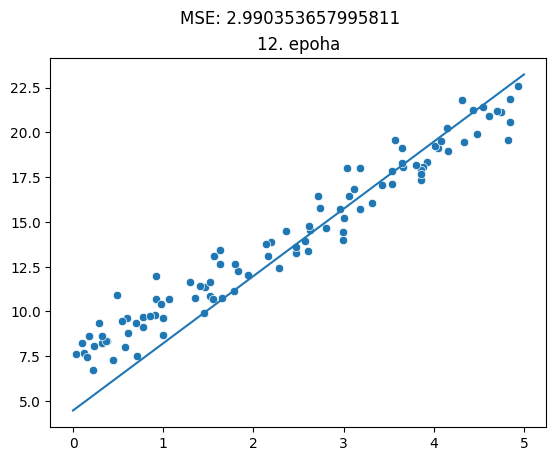

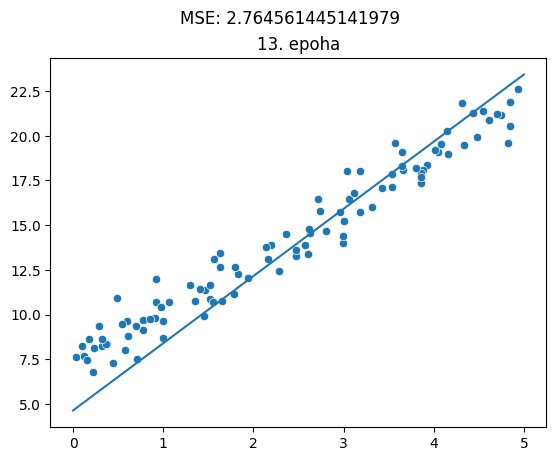

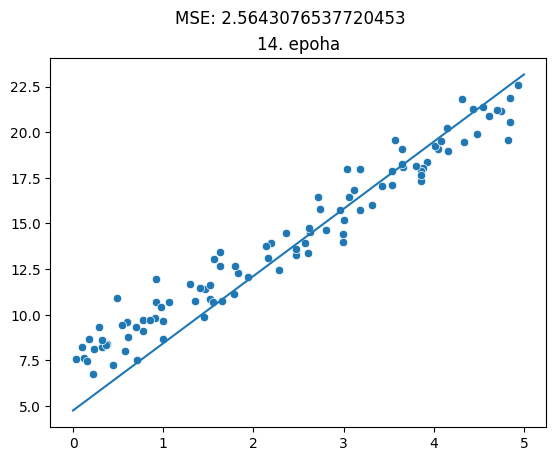

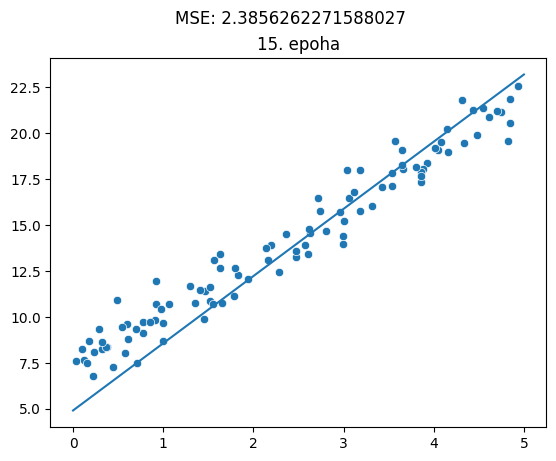

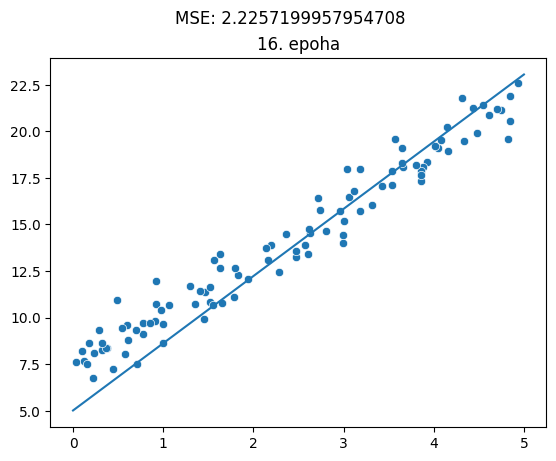

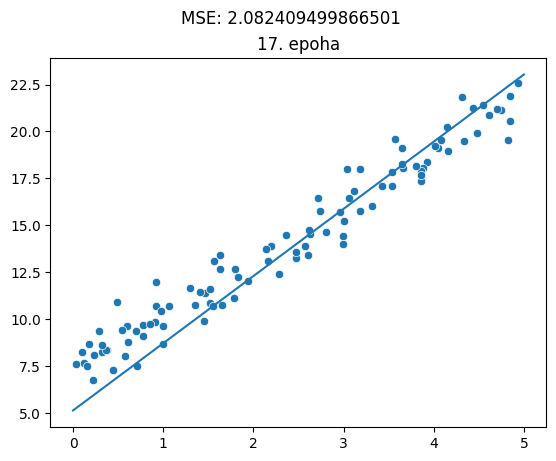

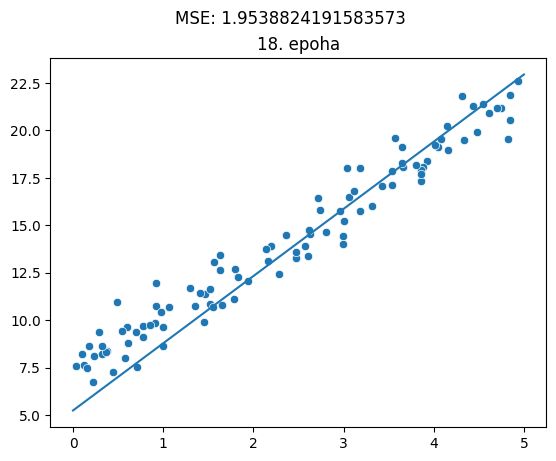

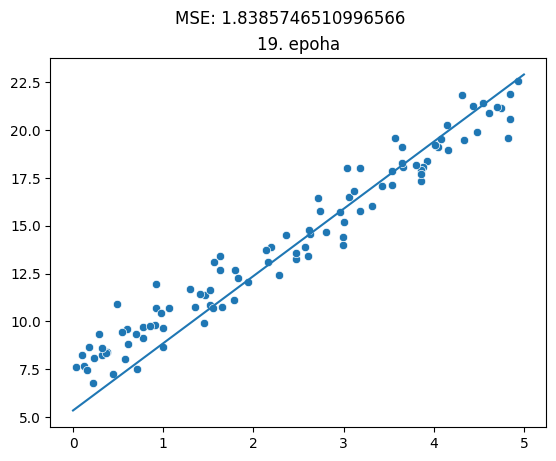

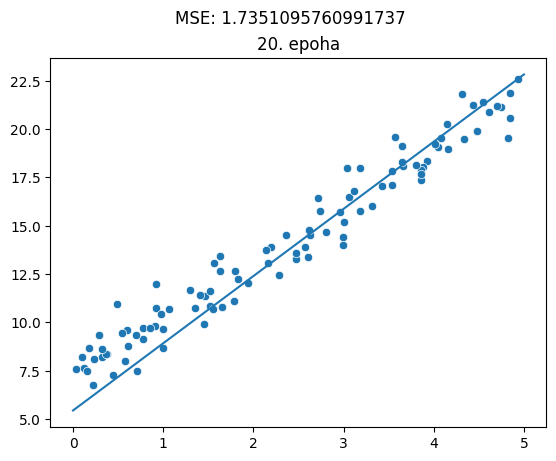

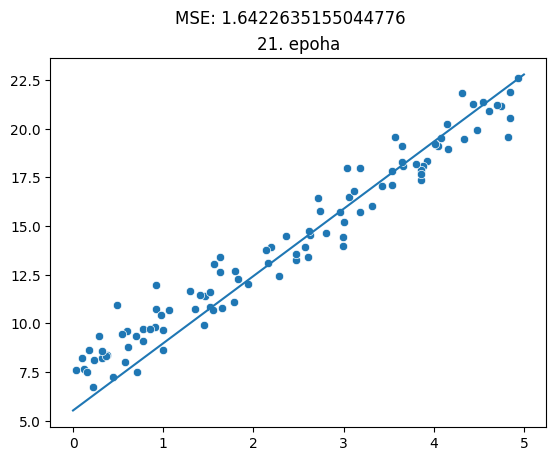

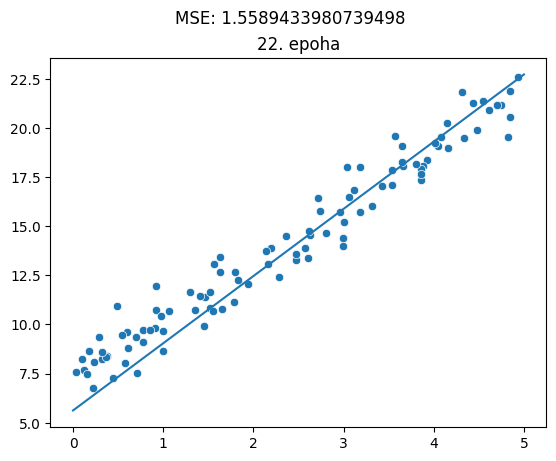

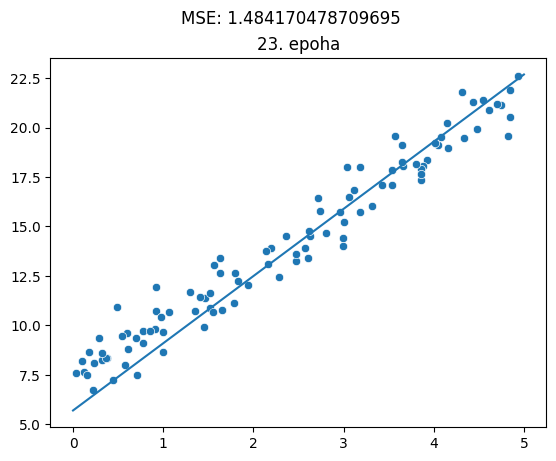

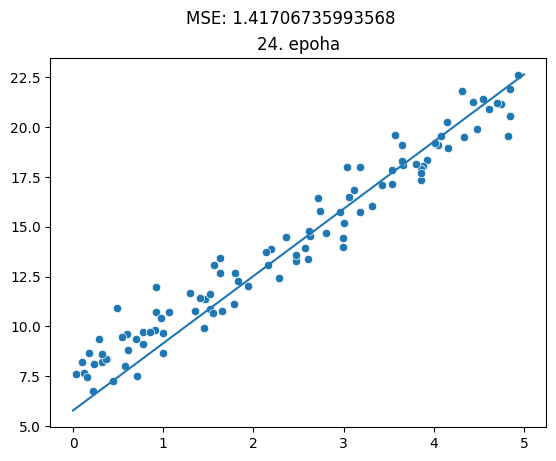

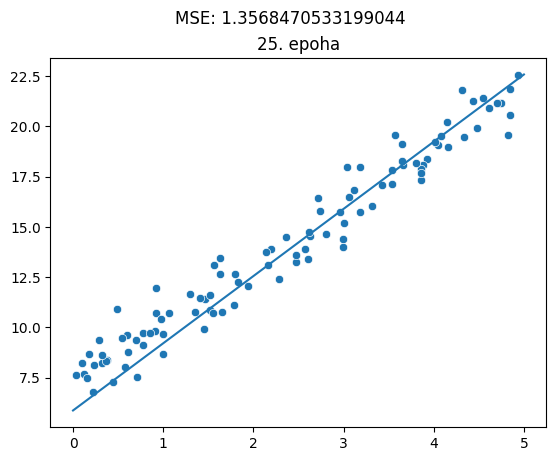

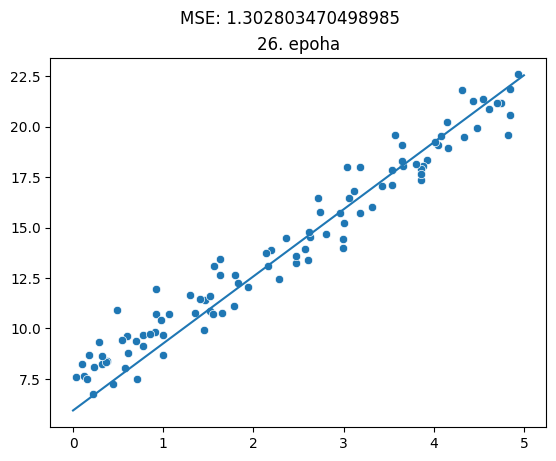

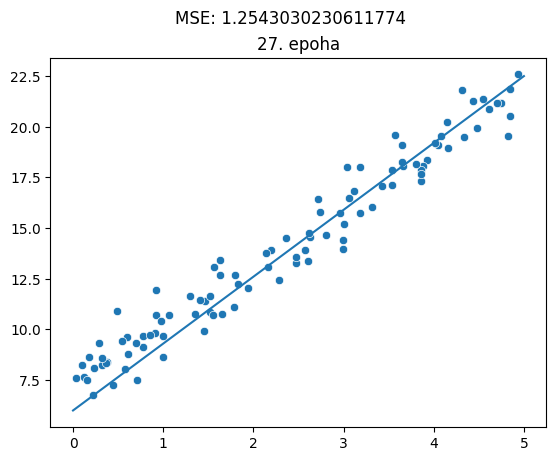

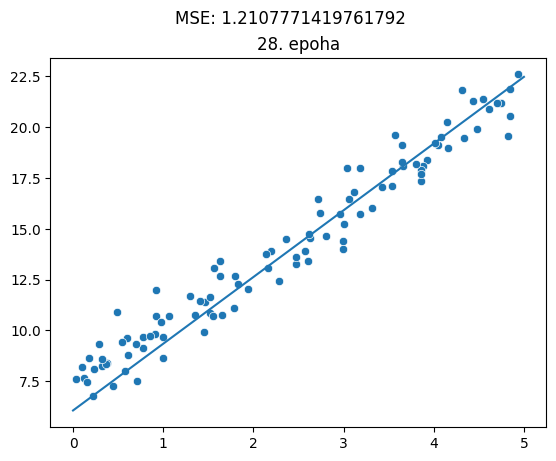

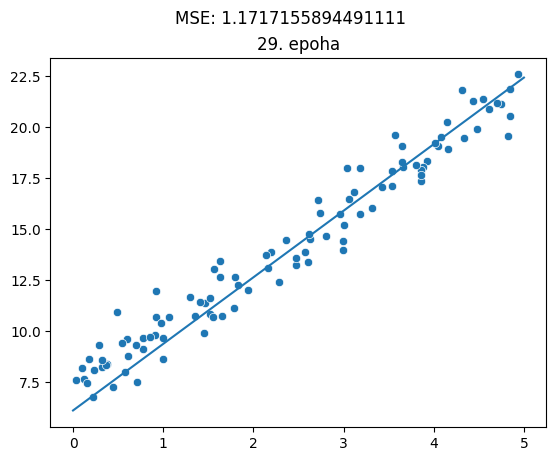

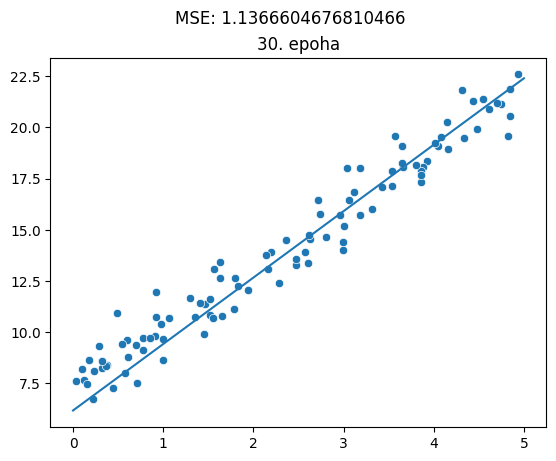

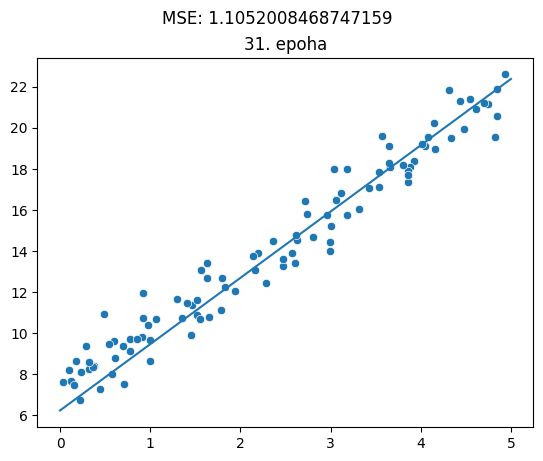

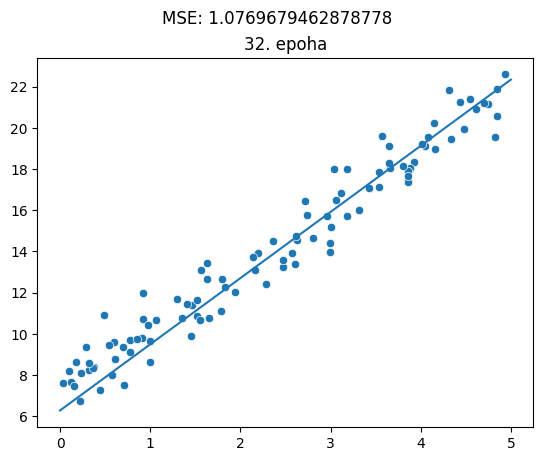

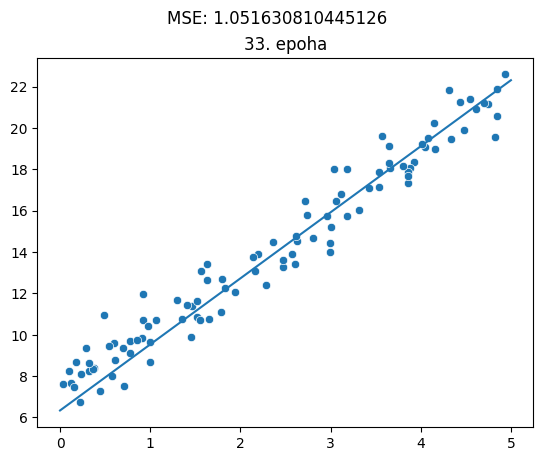

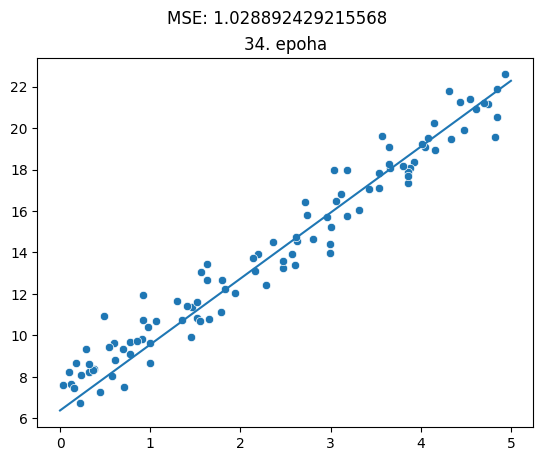

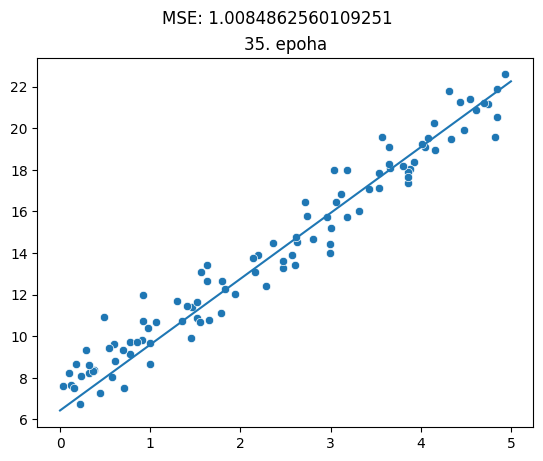

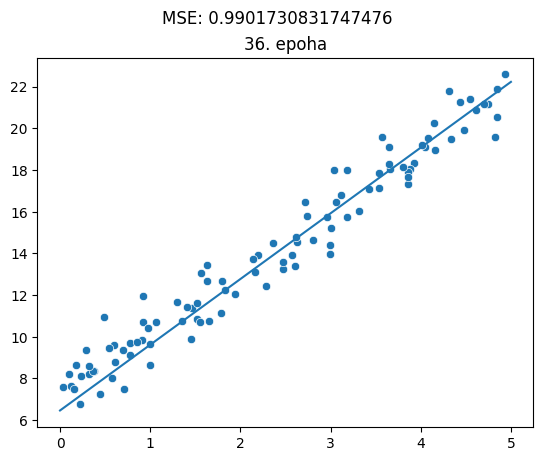

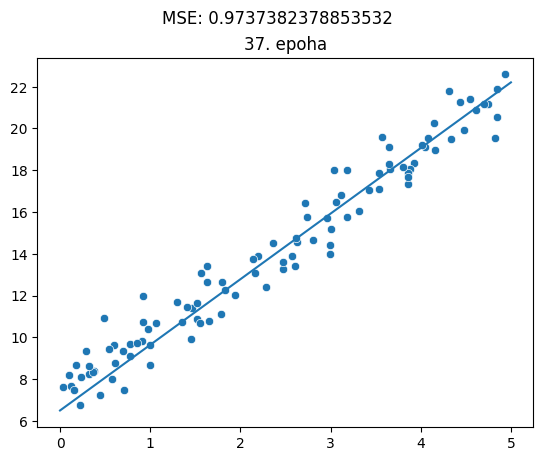

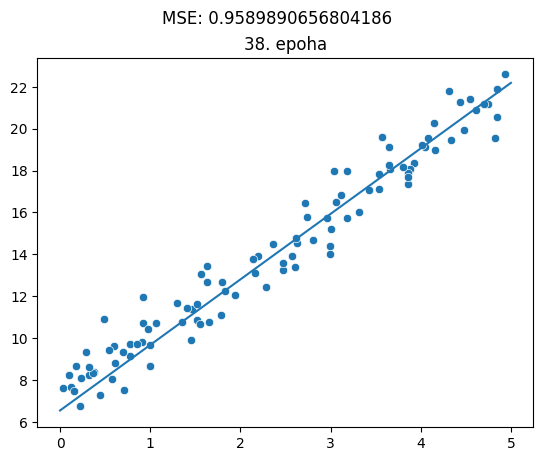

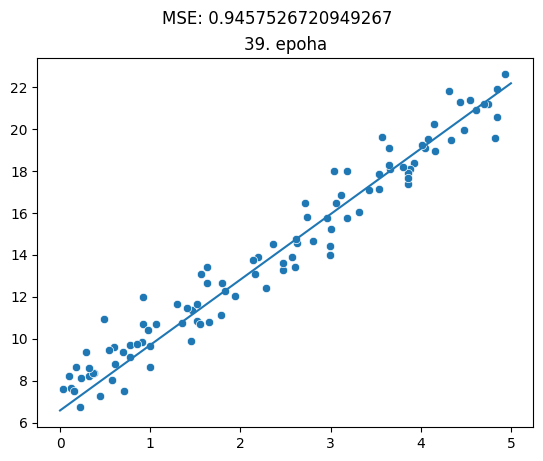

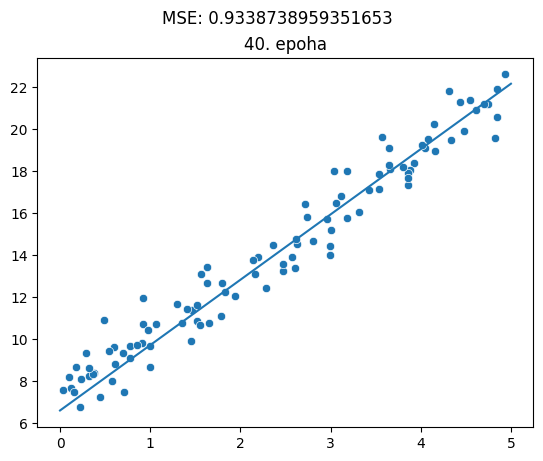

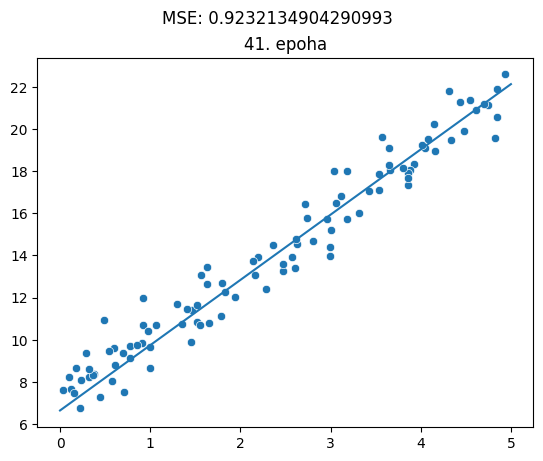

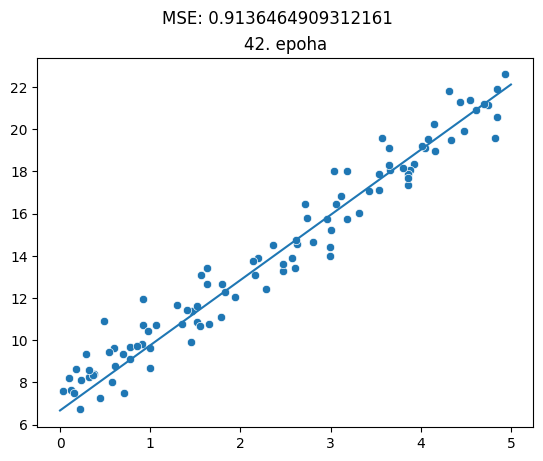

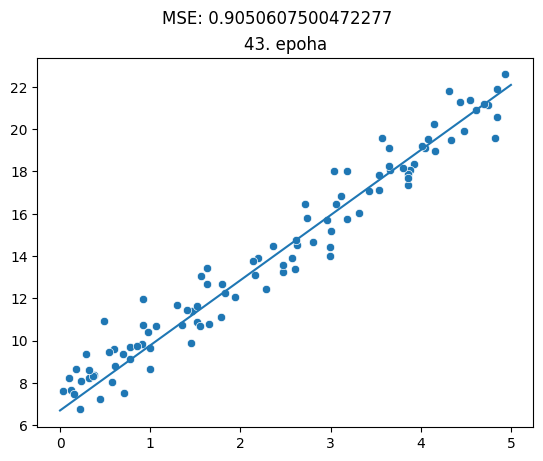

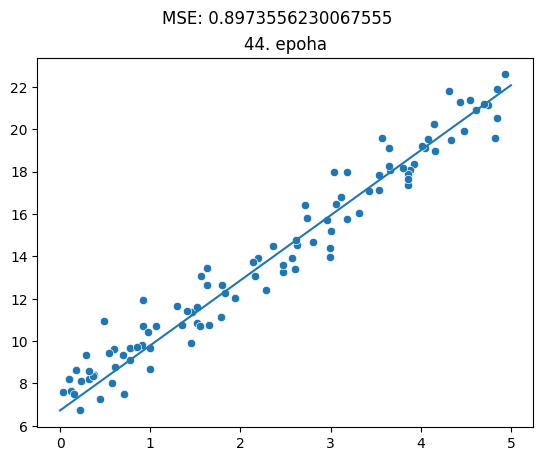

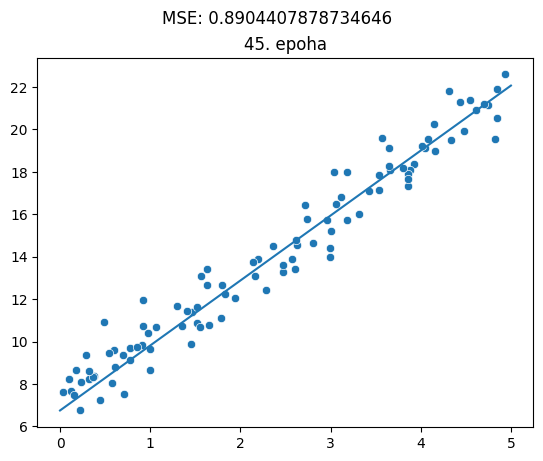

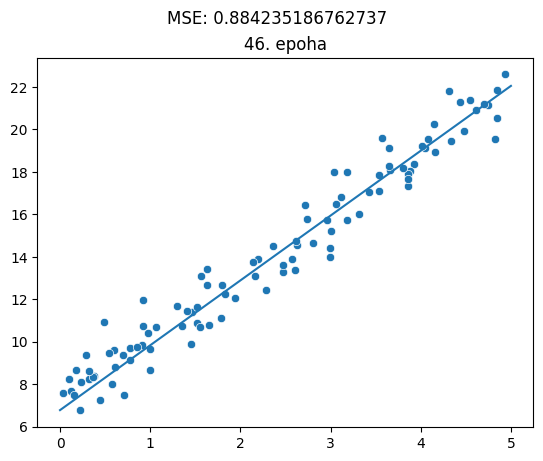

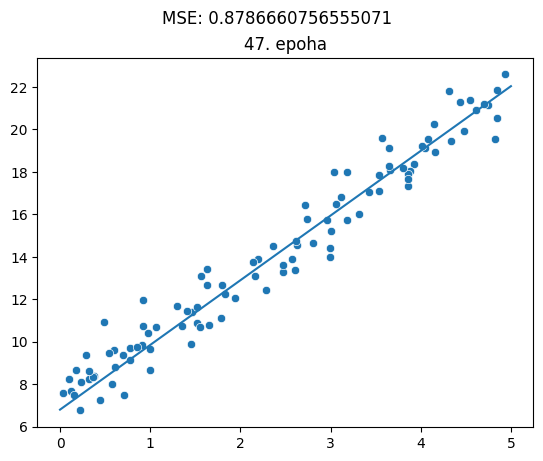

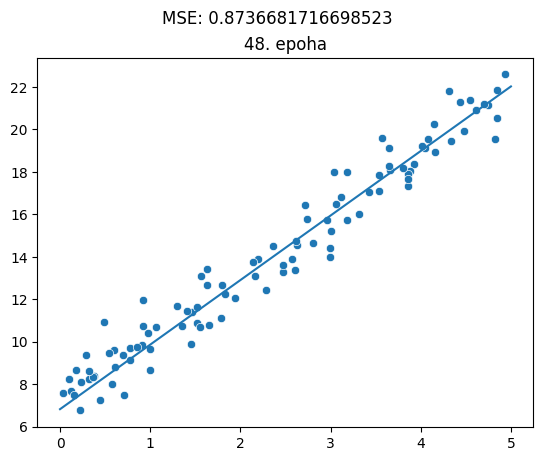

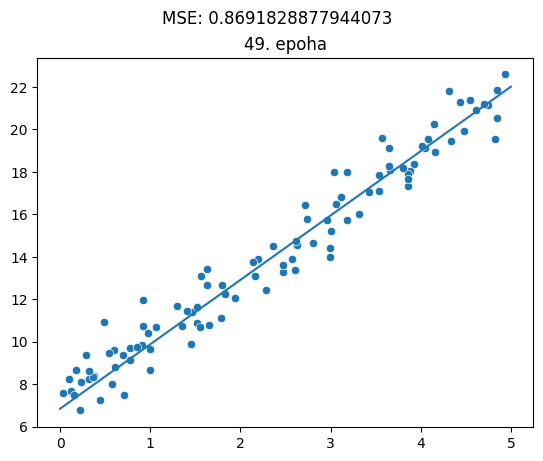

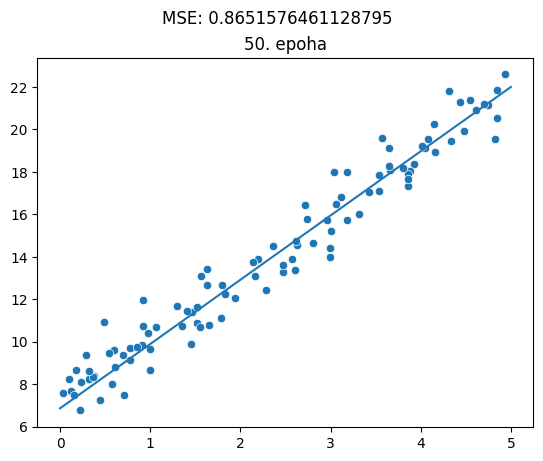

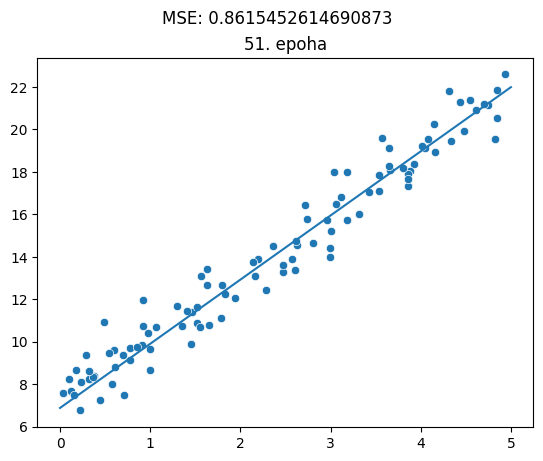

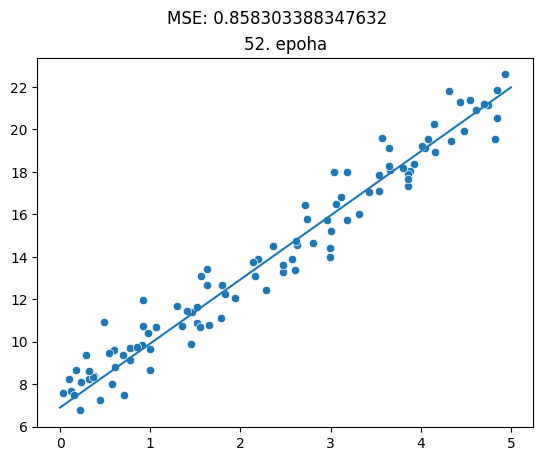

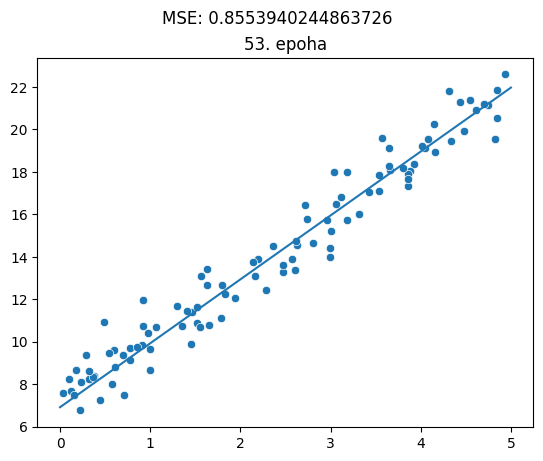

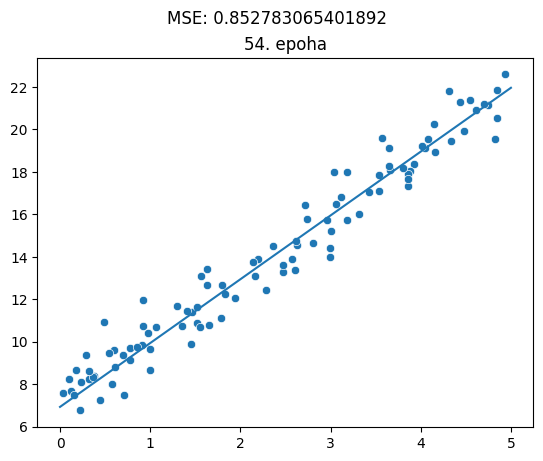

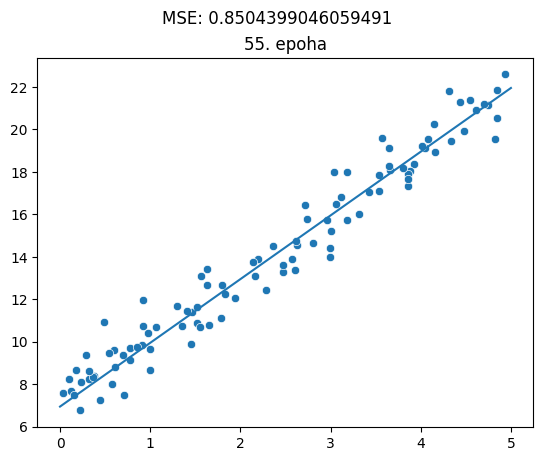

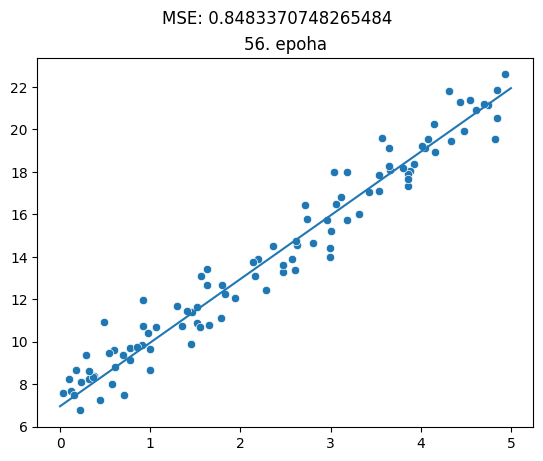

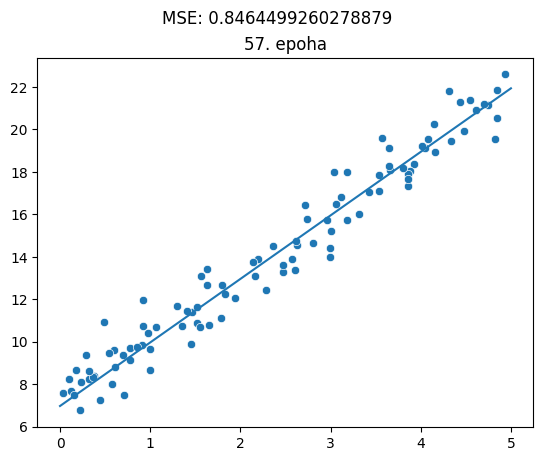

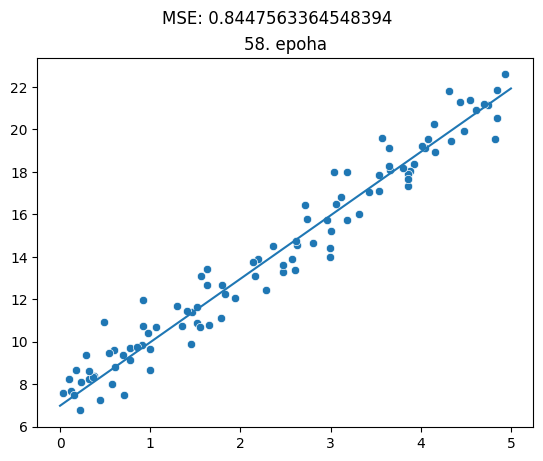

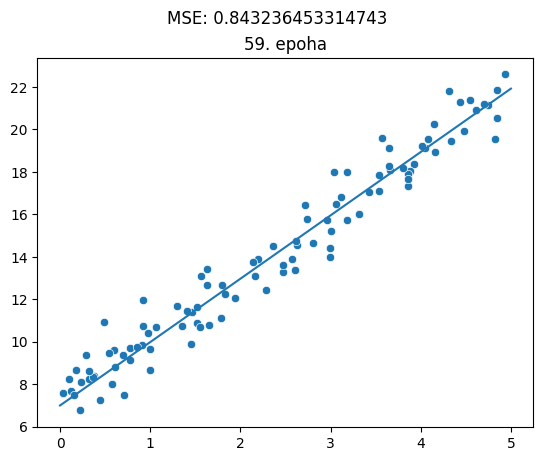

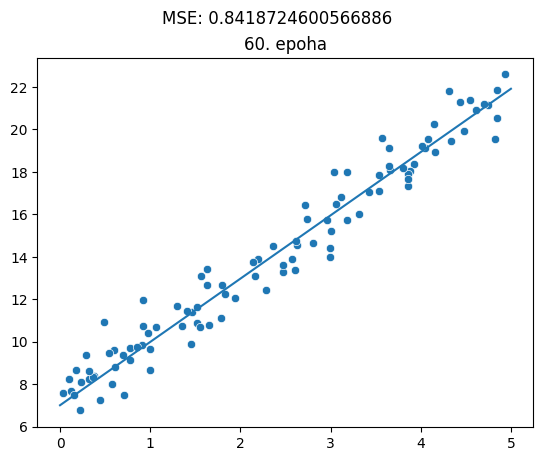

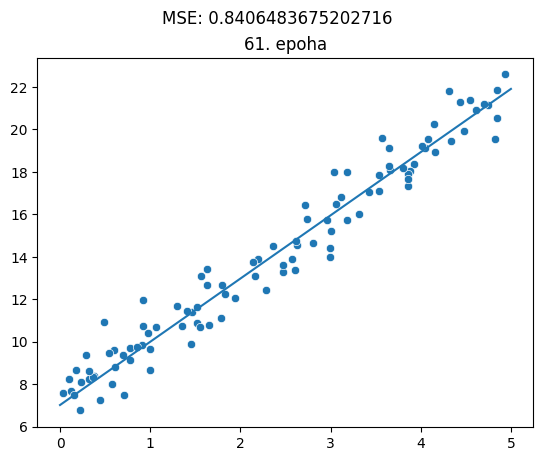

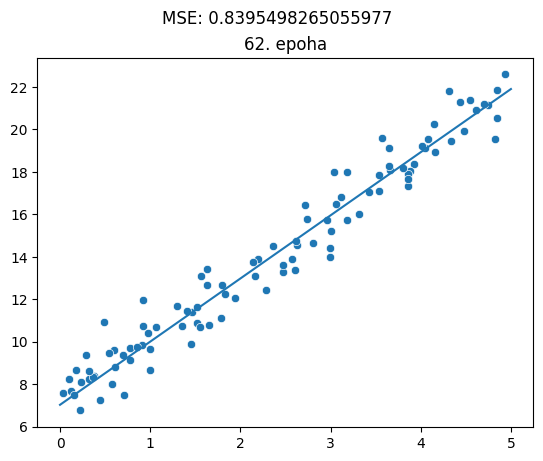

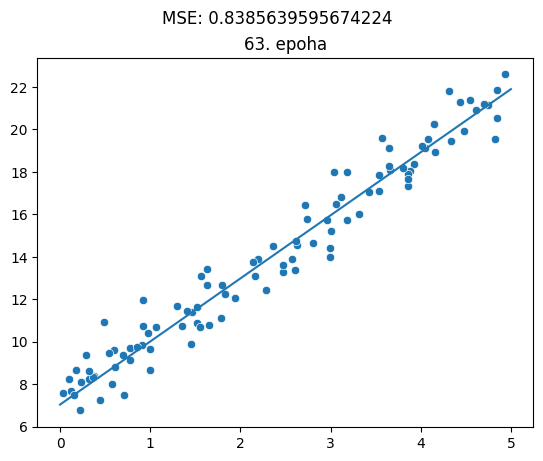

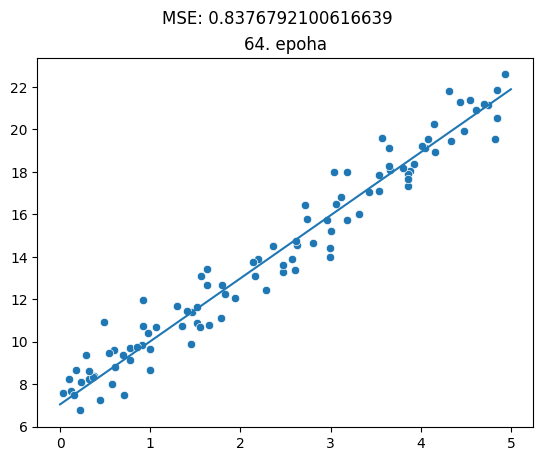

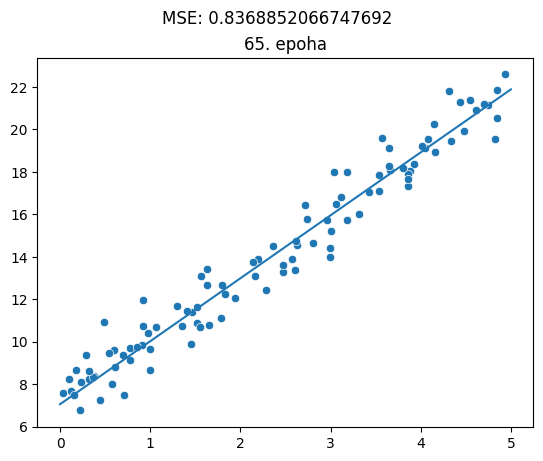

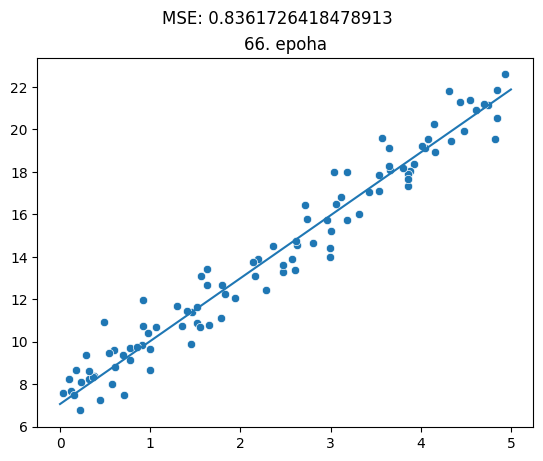

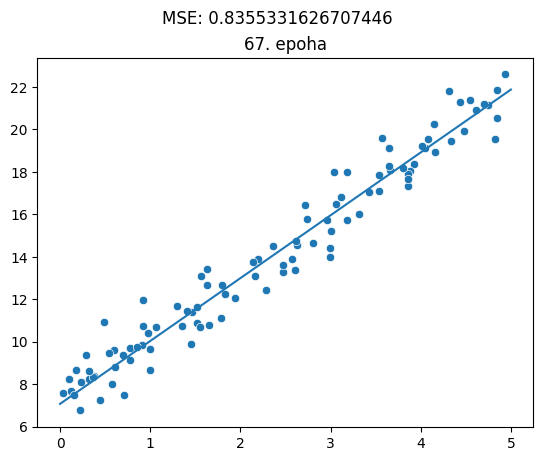

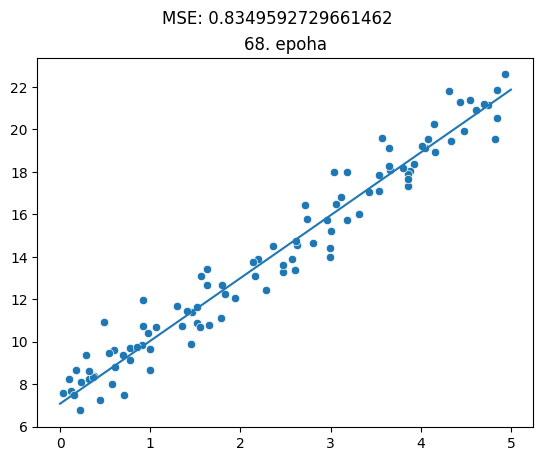

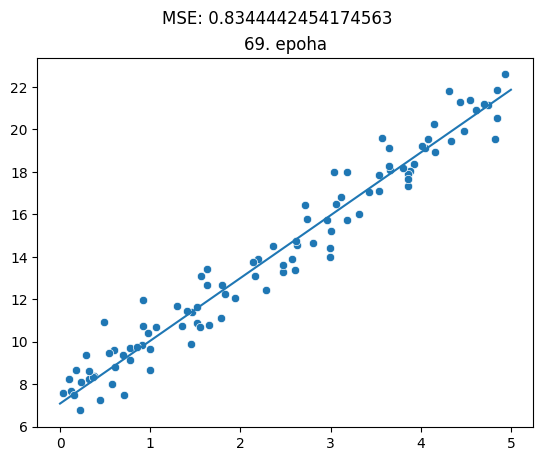

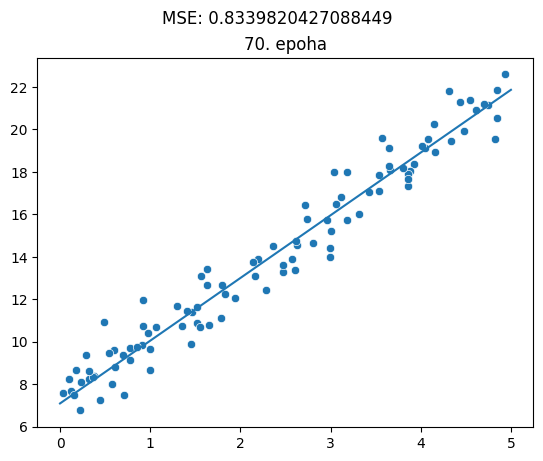

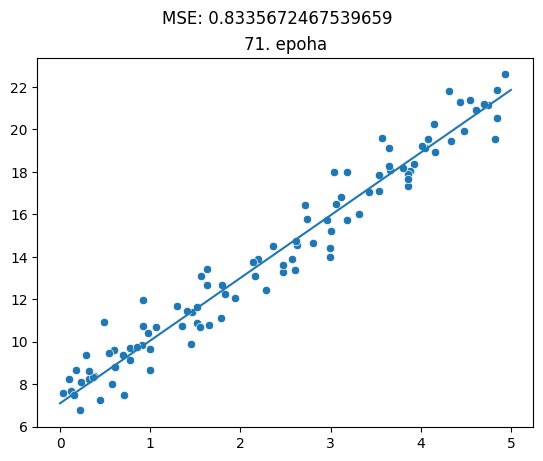

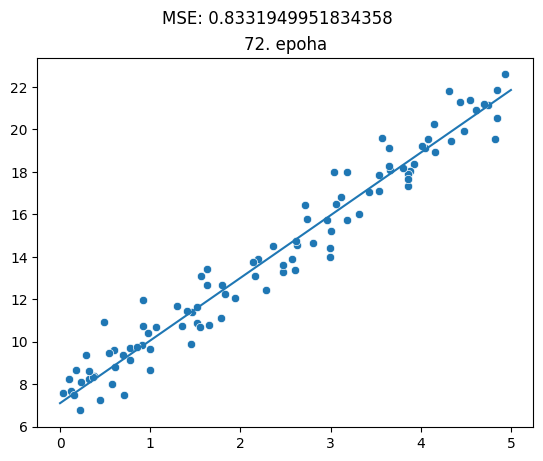

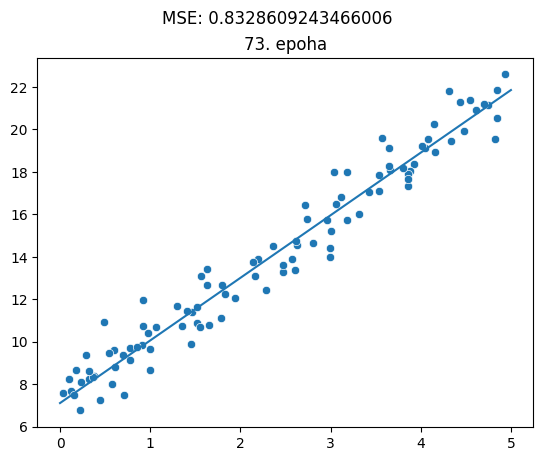

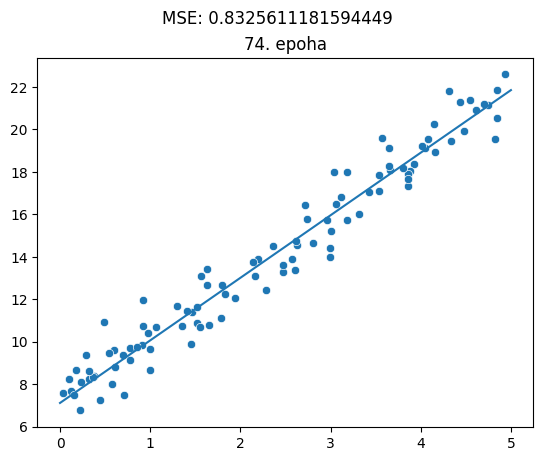

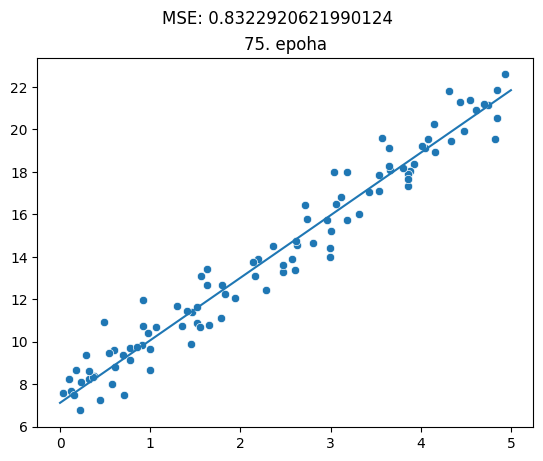

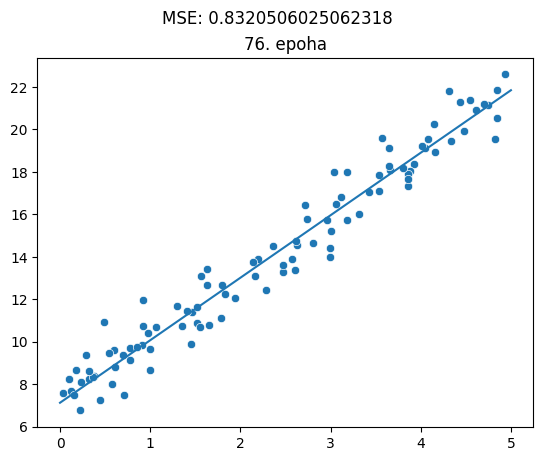

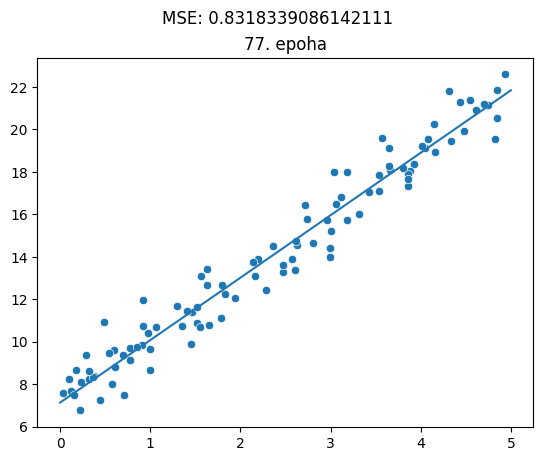

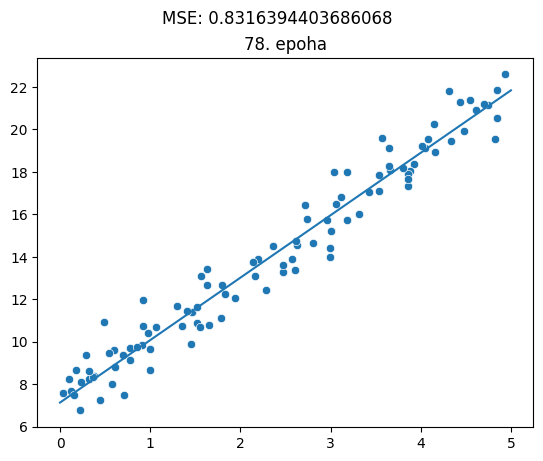

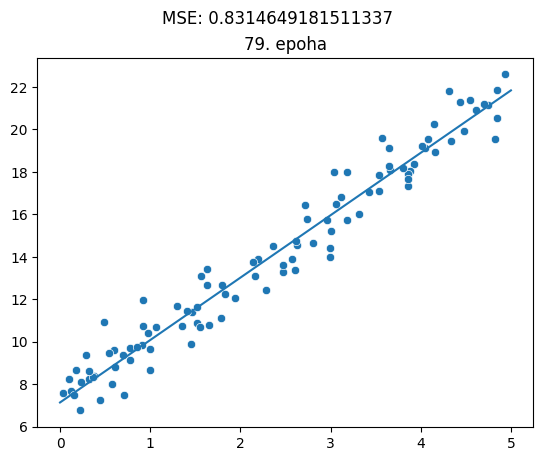

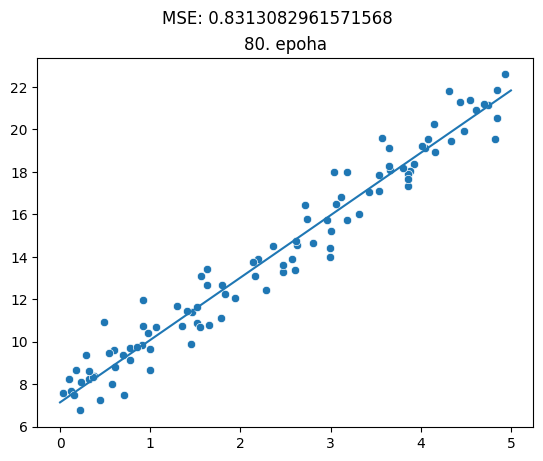

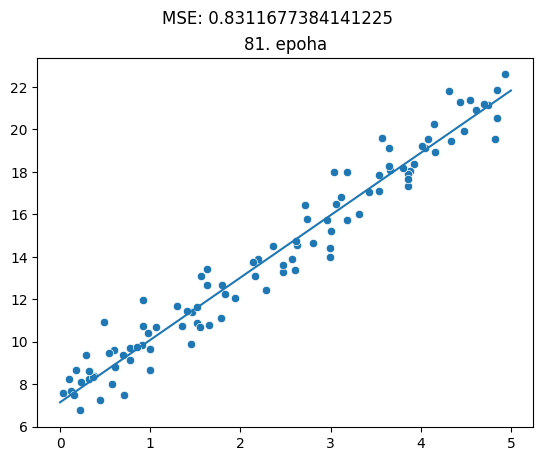

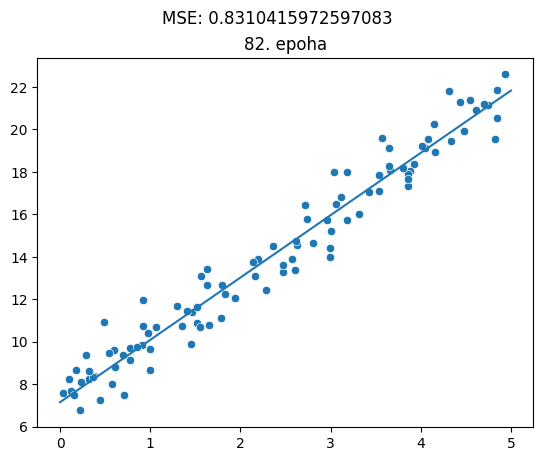

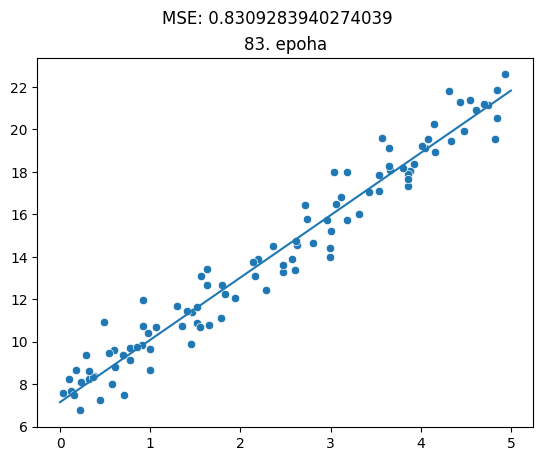

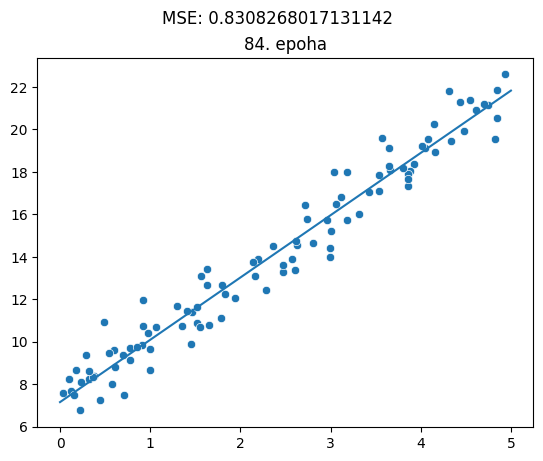

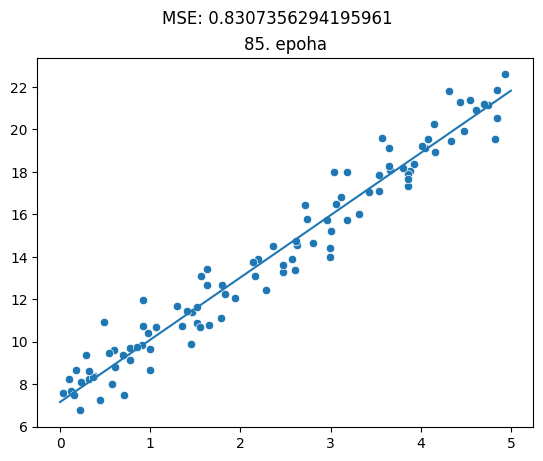

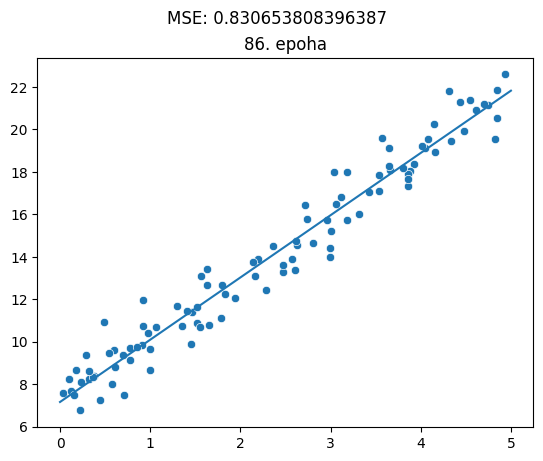

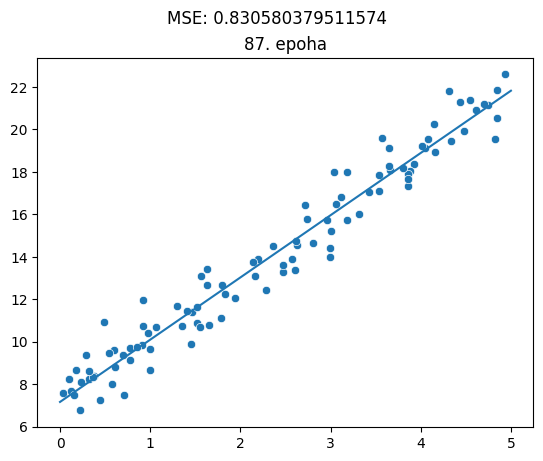

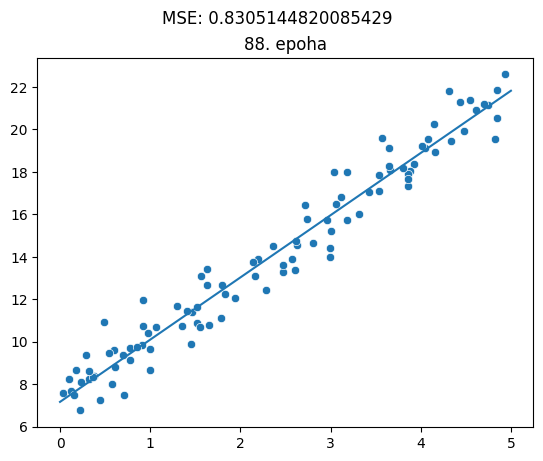

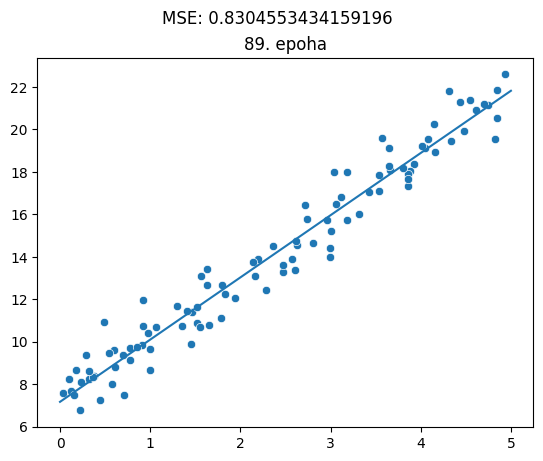

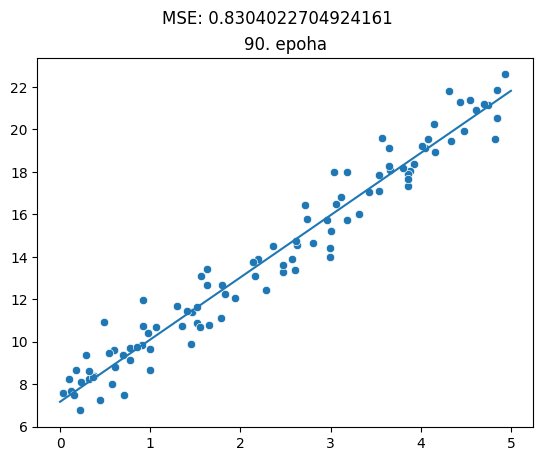

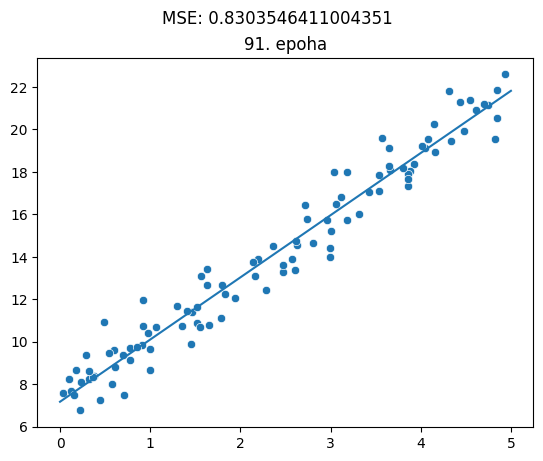

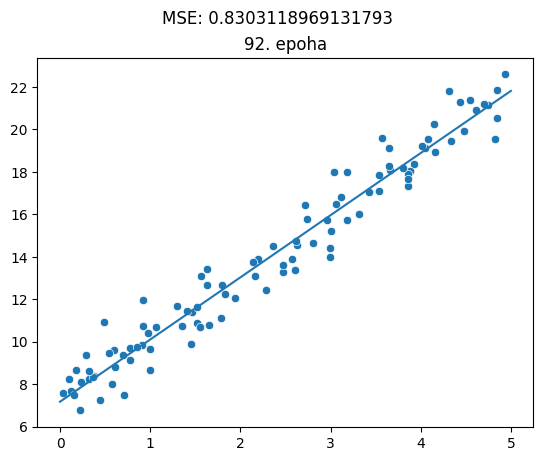

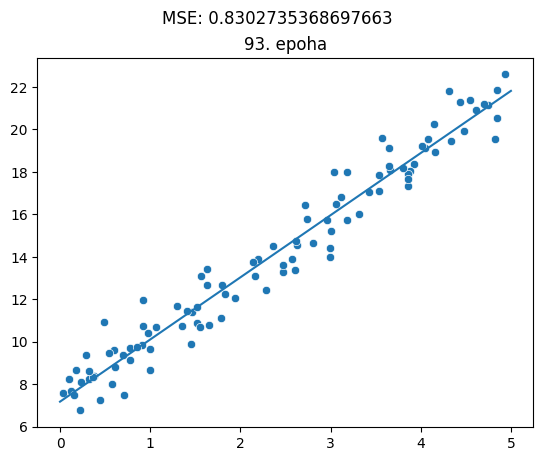

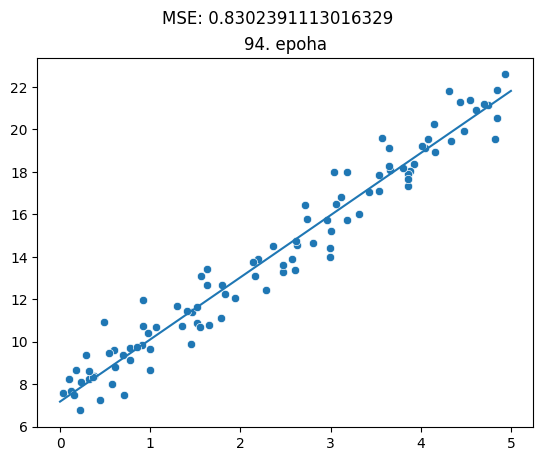

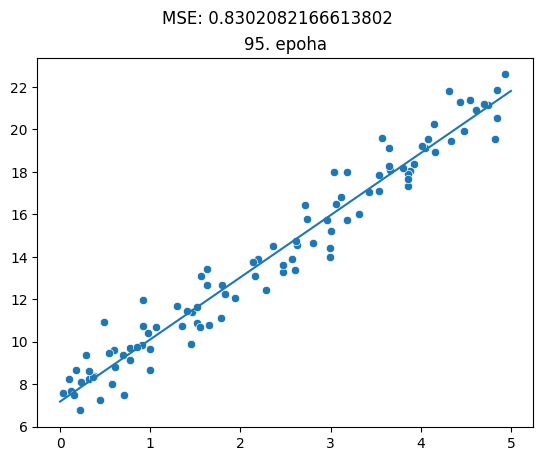

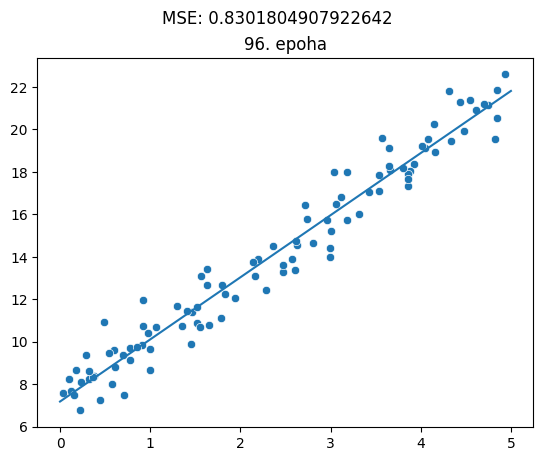

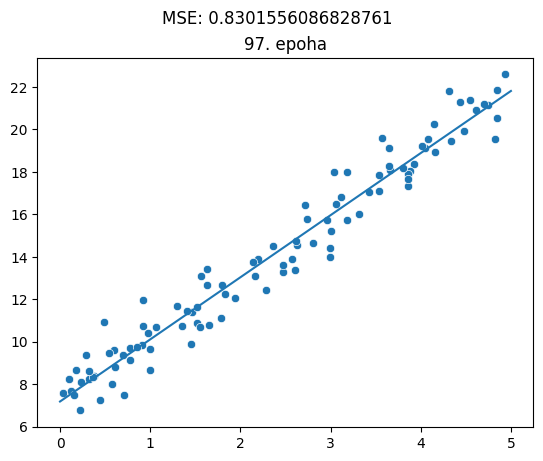

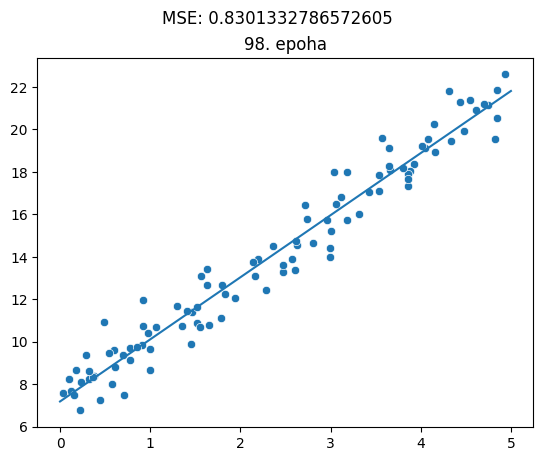

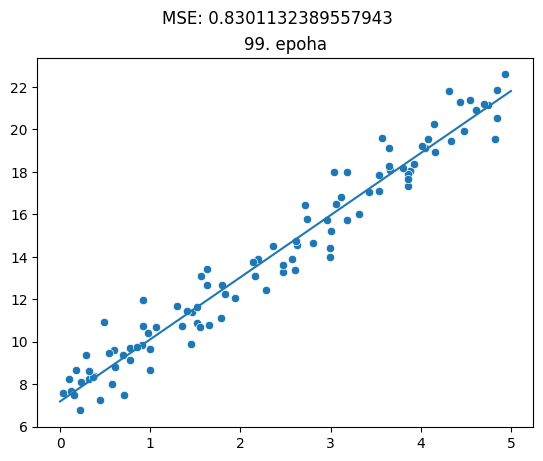

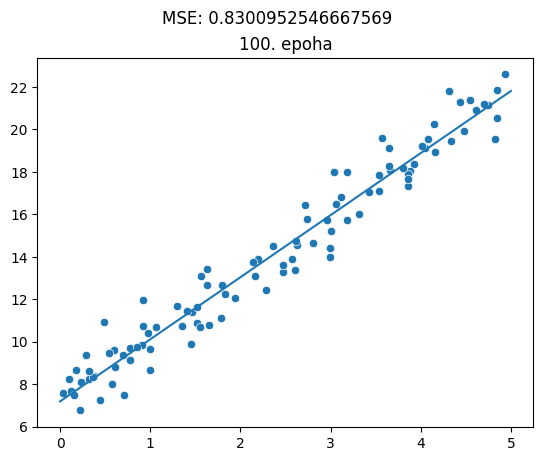

<Figure size 640x480 with 0 Axes>

In [ ]:
figures= []
losses = {} # viticasta da bismo mogli da pristupimo svakoj pojedinacno
for epoch in range(epohe):
  # racunamo predikciju modela
  y_pred= theta[0] + theta[1] * X

  # na osnovu predikcije modela racunamo gresku
  mse= mean_squared_error(y, y_pred)

  # racunamo gradijent
  grad0= -2 * np.mean(y - y_pred) # ima u prezentaciji za linearnu regresiju
  grad1= -2 * np.mean(X * (y - y_pred))

  # primenjujemo gradijent na parametre modela
  theta[0] -= eta * grad0
  theta[1] -= eta * grad1

  y_line = theta[0] + theta[1] * space
  y_pred = theta[0] + theta[1] * X
  mse= mean_squared_error(y, y_pred)
  sns.scatterplot(x=X, y=y)
  sns.lineplot(x=space, y=y_line)
  plt.title(f"{epoch + 1}. epoha")
  plt.suptitle(f"MSE: {mse}")
  fig, _ = plt.subplots()
  figures.append(fig)
  losses[epoch+1]= mse
plt.clf()
